In [84]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [85]:
import numpy as np
import pandas as pd

In [86]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [87]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [88]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [89]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [90]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [91]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [92]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [93]:
from sqlalchemy import inspect

inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [94]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [104]:
test = session.query(Measurement.date)
for d in test:
    print(d)

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)
('2010-01-07',)
('2010-01-08',)
('2010-01-09',)
('2010-01-10',)
('2010-01-11',)
('2010-01-12',)
('2010-01-14',)
('2010-01-15',)
('2010-01-16',)
('2010-01-17',)
('2010-01-18',)
('2010-01-19',)
('2010-01-20',)
('2010-01-21',)
('2010-01-22',)
('2010-01-23',)
('2010-01-24',)
('2010-01-25',)
('2010-01-26',)
('2010-01-27',)
('2010-01-28',)
('2010-01-30',)
('2010-01-31',)
('2010-02-01',)
('2010-02-03',)
('2010-02-04',)
('2010-02-05',)
('2010-02-06',)
('2010-02-07',)
('2010-02-08',)
('2010-02-09',)
('2010-02-11',)
('2010-02-12',)
('2010-02-13',)
('2010-02-14',)
('2010-02-15',)
('2010-02-16',)
('2010-02-17',)
('2010-02-19',)
('2010-02-20',)
('2010-02-21',)
('2010-02-22',)
('2010-02-23',)
('2010-02-24',)
('2010-02-25',)
('2010-02-26',)
('2010-02-28',)
('2010-03-01',)
('2010-03-02',)
('2010-03-03',)
('2010-03-04',)
('2010-03-05',)
('2010-03-06',)
('2010-03-07',)
('2010-03-08',)
('2010-03-09',)
('2010-03-11',)
('2010-0

('2014-12-22',)
('2014-12-23',)
('2014-12-24',)
('2014-12-25',)
('2014-12-26',)
('2014-12-27',)
('2014-12-28',)
('2014-12-29',)
('2014-12-30',)
('2014-12-31',)
('2015-01-01',)
('2015-01-02',)
('2015-01-03',)
('2015-01-04',)
('2015-01-05',)
('2015-01-06',)
('2015-01-07',)
('2015-01-08',)
('2015-01-09',)
('2015-01-10',)
('2015-01-11',)
('2015-01-12',)
('2015-01-13',)
('2015-01-14',)
('2015-01-15',)
('2015-01-16',)
('2015-01-17',)
('2015-01-18',)
('2015-01-19',)
('2015-01-20',)
('2015-01-21',)
('2015-01-22',)
('2015-01-23',)
('2015-01-24',)
('2015-01-25',)
('2015-01-26',)
('2015-01-27',)
('2015-01-28',)
('2015-01-29',)
('2015-01-30',)
('2015-01-31',)
('2015-02-01',)
('2015-02-02',)
('2015-02-03',)
('2015-02-04',)
('2015-02-05',)
('2015-02-06',)
('2015-02-07',)
('2015-02-08',)
('2015-02-09',)
('2015-02-10',)
('2015-02-11',)
('2015-02-12',)
('2015-02-13',)
('2015-02-14',)
('2015-02-15',)
('2015-02-16',)
('2015-02-17',)
('2015-02-18',)
('2015-02-19',)
('2015-02-20',)
('2015-02-21',)
('2015-0

('2016-06-29',)
('2016-06-30',)
('2016-07-01',)
('2016-07-02',)
('2016-07-03',)
('2016-07-04',)
('2016-07-05',)
('2016-07-06',)
('2016-07-07',)
('2016-07-08',)
('2016-07-09',)
('2016-07-10',)
('2016-07-11',)
('2016-07-12',)
('2016-07-13',)
('2016-07-14',)
('2016-07-15',)
('2016-07-16',)
('2016-07-17',)
('2016-07-18',)
('2016-07-19',)
('2016-07-20',)
('2016-07-21',)
('2016-07-22',)
('2016-07-23',)
('2016-07-24',)
('2016-07-25',)
('2016-07-26',)
('2016-07-27',)
('2016-07-28',)
('2016-07-29',)
('2016-07-30',)
('2016-07-31',)
('2016-08-01',)
('2016-08-02',)
('2016-08-03',)
('2016-08-04',)
('2016-08-05',)
('2016-08-06',)
('2016-08-07',)
('2016-08-08',)
('2016-08-09',)
('2016-08-10',)
('2016-08-11',)
('2016-08-12',)
('2016-08-13',)
('2016-08-14',)
('2016-08-15',)
('2016-08-16',)
('2016-08-17',)
('2016-08-18',)
('2016-08-19',)
('2016-08-20',)
('2016-08-21',)
('2016-08-22',)
('2016-08-23',)
('2016-08-24',)
('2016-08-25',)
('2016-08-26',)
('2016-08-27',)
('2016-08-28',)
('2016-08-29',)
('2016-0

('2013-01-11',)
('2013-01-13',)
('2013-01-14',)
('2013-01-15',)
('2013-01-16',)
('2013-01-17',)
('2013-01-18',)
('2013-01-19',)
('2013-01-20',)
('2013-01-21',)
('2013-01-22',)
('2013-01-23',)
('2013-01-24',)
('2013-01-25',)
('2013-01-26',)
('2013-01-27',)
('2013-01-28',)
('2013-01-29',)
('2013-01-30',)
('2013-01-31',)
('2013-02-01',)
('2013-02-02',)
('2013-02-03',)
('2013-02-04',)
('2013-02-05',)
('2013-02-06',)
('2013-02-07',)
('2013-02-08',)
('2013-02-09',)
('2013-02-10',)
('2013-02-11',)
('2013-02-12',)
('2013-02-13',)
('2013-02-14',)
('2013-02-15',)
('2013-02-16',)
('2013-02-17',)
('2013-02-18',)
('2013-02-19',)
('2013-02-20',)
('2013-02-21',)
('2013-02-22',)
('2013-02-23',)
('2013-02-24',)
('2013-02-25',)
('2013-02-26',)
('2013-02-27',)
('2013-02-28',)
('2013-03-01',)
('2013-03-02',)
('2013-03-03',)
('2013-03-04',)
('2013-03-05',)
('2013-03-06',)
('2013-03-07',)
('2013-03-08',)
('2013-03-09',)
('2013-03-10',)
('2013-03-11',)
('2013-03-12',)
('2013-03-13',)
('2013-03-14',)
('2013-0

('2017-03-28',)
('2017-03-29',)
('2017-03-30',)
('2017-03-31',)
('2017-04-01',)
('2017-04-02',)
('2017-04-03',)
('2017-04-04',)
('2017-04-05',)
('2017-04-06',)
('2017-04-07',)
('2017-04-08',)
('2017-04-09',)
('2017-04-10',)
('2017-04-11',)
('2017-04-12',)
('2017-04-13',)
('2017-04-14',)
('2017-04-15',)
('2017-04-16',)
('2017-04-17',)
('2017-04-18',)
('2017-04-19',)
('2017-04-20',)
('2017-04-21',)
('2017-04-22',)
('2017-04-23',)
('2017-04-24',)
('2017-04-25',)
('2017-04-26',)
('2017-04-27',)
('2017-04-28',)
('2017-04-29',)
('2017-04-30',)
('2017-05-01',)
('2017-05-02',)
('2017-05-03',)
('2017-05-04',)
('2017-05-05',)
('2017-05-06',)
('2017-05-07',)
('2017-05-08',)
('2017-05-09',)
('2017-05-10',)
('2017-05-11',)
('2017-05-12',)
('2017-05-13',)
('2017-05-14',)
('2017-05-15',)
('2017-05-16',)
('2017-05-17',)
('2017-05-18',)
('2017-05-19',)
('2017-05-20',)
('2017-05-21',)
('2017-05-22',)
('2017-05-23',)
('2017-05-24',)
('2017-05-25',)
('2017-05-26',)
('2017-05-27',)
('2017-05-28',)
('2017-0

('2014-12-03',)
('2014-12-04',)
('2014-12-05',)
('2014-12-06',)
('2014-12-08',)
('2014-12-09',)
('2014-12-10',)
('2014-12-11',)
('2014-12-12',)
('2014-12-13',)
('2014-12-15',)
('2014-12-16',)
('2014-12-17',)
('2014-12-18',)
('2014-12-19',)
('2014-12-20',)
('2014-12-22',)
('2014-12-23',)
('2014-12-25',)
('2014-12-29',)
('2014-12-31',)
('2015-01-01',)
('2015-01-02',)
('2015-01-03',)
('2015-01-04',)
('2015-01-05',)
('2015-01-06',)
('2015-01-07',)
('2015-01-08',)
('2015-01-09',)
('2015-01-11',)
('2015-01-12',)
('2015-01-13',)
('2015-01-14',)
('2015-01-15',)
('2015-01-16',)
('2015-01-17',)
('2015-01-19',)
('2015-01-20',)
('2015-01-21',)
('2015-01-22',)
('2015-01-23',)
('2015-01-24',)
('2015-01-26',)
('2015-01-30',)
('2015-01-31',)
('2015-02-02',)
('2015-02-03',)
('2015-02-04',)
('2015-02-05',)
('2015-02-06',)
('2015-02-10',)
('2015-02-11',)
('2015-02-12',)
('2015-02-13',)
('2015-02-14',)
('2015-02-18',)
('2015-02-19',)
('2015-02-20',)
('2015-02-21',)
('2015-02-22',)
('2015-02-23',)
('2015-0

('2011-02-18',)
('2011-02-22',)
('2011-02-23',)
('2011-02-24',)
('2011-02-25',)
('2011-02-28',)
('2011-03-01',)
('2011-03-02',)
('2011-03-07',)
('2011-03-08',)
('2011-03-09',)
('2011-03-10',)
('2011-03-14',)
('2011-03-15',)
('2011-03-16',)
('2011-03-30',)
('2011-03-31',)
('2011-04-01',)
('2011-04-04',)
('2011-04-05',)
('2011-04-06',)
('2011-04-07',)
('2011-04-11',)
('2011-04-12',)
('2011-04-13',)
('2011-04-14',)
('2011-04-15',)
('2011-04-18',)
('2011-04-19',)
('2011-04-20',)
('2011-04-21',)
('2011-04-25',)
('2011-04-26',)
('2011-04-27',)
('2011-04-28',)
('2011-05-02',)
('2011-05-03',)
('2011-05-04',)
('2011-05-05',)
('2011-05-06',)
('2011-05-09',)
('2011-05-10',)
('2011-05-11',)
('2011-05-12',)
('2011-05-16',)
('2011-05-17',)
('2011-05-18',)
('2011-05-19',)
('2011-05-20',)
('2011-05-23',)
('2011-05-24',)
('2011-05-25',)
('2011-05-26',)
('2011-05-27',)
('2011-05-31',)
('2011-06-01',)
('2011-06-02',)
('2011-06-03',)
('2011-06-06',)
('2011-06-07',)
('2011-06-08',)
('2011-06-09',)
('2011-0

('2011-04-25',)
('2011-04-26',)
('2011-04-27',)
('2011-04-28',)
('2011-04-29',)
('2011-05-02',)
('2011-05-03',)
('2011-05-04',)
('2011-05-05',)
('2011-05-06',)
('2011-05-09',)
('2011-05-10',)
('2011-05-11',)
('2011-05-12',)
('2011-05-16',)
('2011-05-17',)
('2011-05-18',)
('2011-05-19',)
('2011-05-20',)
('2011-05-23',)
('2011-05-24',)
('2011-05-25',)
('2011-06-08',)
('2011-06-09',)
('2011-06-12',)
('2011-06-13',)
('2011-06-14',)
('2011-06-15',)
('2011-06-16',)
('2011-06-20',)
('2011-06-21',)
('2011-06-22',)
('2011-07-06',)
('2011-07-07',)
('2011-08-08',)
('2011-08-10',)
('2011-08-12',)
('2011-08-24',)
('2011-09-01',)
('2011-09-02',)
('2011-09-07',)
('2011-09-09',)
('2011-09-23',)
('2011-09-26',)
('2011-10-20',)
('2011-10-31',)
('2011-11-04',)
('2012-01-05',)
('2012-01-09',)
('2012-01-10',)
('2012-01-11',)
('2012-01-12',)
('2012-01-14',)
('2012-01-16',)
('2012-01-17',)
('2012-01-18',)
('2012-01-19',)
('2012-01-20',)
('2012-01-23',)
('2012-01-24',)
('2012-01-25',)
('2012-01-26',)
('2012-0

('2013-07-22',)
('2013-07-23',)
('2013-07-24',)
('2013-07-25',)
('2013-07-26',)
('2013-07-28',)
('2013-07-29',)
('2013-07-30',)
('2013-07-31',)
('2013-08-01',)
('2013-08-02',)
('2013-08-03',)
('2013-08-04',)
('2013-08-05',)
('2013-08-06',)
('2013-08-07',)
('2013-08-08',)
('2013-08-09',)
('2013-08-10',)
('2013-08-11',)
('2013-08-12',)
('2013-08-13',)
('2013-08-14',)
('2013-08-15',)
('2013-08-16',)
('2013-08-17',)
('2013-08-18',)
('2013-08-19',)
('2013-08-20',)
('2013-08-21',)
('2013-08-22',)
('2013-08-23',)
('2013-08-24',)
('2013-08-25',)
('2013-08-26',)
('2013-08-27',)
('2013-08-28',)
('2013-08-29',)
('2013-08-31',)
('2013-09-01',)
('2013-09-02',)
('2013-09-03',)
('2013-09-04',)
('2013-09-05',)
('2013-09-06',)
('2013-09-07',)
('2013-09-09',)
('2013-09-10',)
('2013-09-11',)
('2013-09-12',)
('2013-09-13',)
('2013-09-14',)
('2013-09-15',)
('2013-09-16',)
('2013-09-17',)
('2013-09-18',)
('2013-09-19',)
('2013-09-20',)
('2013-09-22',)
('2013-09-23',)
('2013-09-25',)
('2013-09-26',)
('2013-0

('2010-04-29',)
('2010-04-30',)
('2010-05-01',)
('2010-05-02',)
('2010-05-03',)
('2010-05-04',)
('2010-05-05',)
('2010-05-06',)
('2010-05-07',)
('2010-05-08',)
('2010-05-09',)
('2010-05-10',)
('2010-05-11',)
('2010-05-12',)
('2010-05-13',)
('2010-05-14',)
('2010-05-15',)
('2010-05-16',)
('2010-05-17',)
('2010-05-18',)
('2010-05-19',)
('2010-05-20',)
('2010-05-21',)
('2010-05-22',)
('2010-05-23',)
('2010-05-24',)
('2010-05-25',)
('2010-05-26',)
('2010-05-27',)
('2010-05-28',)
('2010-05-29',)
('2010-05-30',)
('2010-05-31',)
('2010-06-01',)
('2010-06-02',)
('2010-06-03',)
('2010-06-04',)
('2010-06-05',)
('2010-06-06',)
('2010-06-07',)
('2010-06-08',)
('2010-06-09',)
('2010-06-10',)
('2010-06-11',)
('2010-06-12',)
('2010-06-13',)
('2010-06-14',)
('2010-06-15',)
('2010-06-16',)
('2010-06-17',)
('2010-06-18',)
('2010-06-19',)
('2010-06-20',)
('2010-06-21',)
('2010-06-22',)
('2010-06-23',)
('2010-06-24',)
('2010-06-25',)
('2010-06-26',)
('2010-06-27',)
('2010-06-28',)
('2010-06-29',)
('2010-0

('2014-06-11',)
('2014-06-12',)
('2014-06-13',)
('2014-06-14',)
('2014-06-15',)
('2014-06-16',)
('2014-06-17',)
('2014-06-18',)
('2014-06-19',)
('2014-06-20',)
('2014-06-21',)
('2014-06-22',)
('2014-06-23',)
('2014-06-24',)
('2014-06-25',)
('2014-06-26',)
('2014-06-27',)
('2014-06-28',)
('2014-06-29',)
('2014-06-30',)
('2014-07-01',)
('2014-07-02',)
('2014-07-03',)
('2014-07-04',)
('2014-07-05',)
('2014-07-06',)
('2014-07-07',)
('2014-07-08',)
('2014-07-09',)
('2014-07-10',)
('2014-07-11',)
('2014-07-12',)
('2014-07-13',)
('2014-07-14',)
('2014-07-15',)
('2014-07-16',)
('2014-07-17',)
('2014-07-18',)
('2014-07-19',)
('2014-07-20',)
('2014-07-21',)
('2014-07-22',)
('2014-07-23',)
('2014-07-24',)
('2014-07-25',)
('2014-07-26',)
('2014-07-27',)
('2014-07-28',)
('2014-07-29',)
('2014-07-30',)
('2014-07-31',)
('2014-08-01',)
('2014-08-02',)
('2014-08-03',)
('2014-08-04',)
('2014-08-05',)
('2014-08-06',)
('2014-08-07',)
('2014-08-08',)
('2014-08-09',)
('2014-08-10',)
('2014-08-11',)
('2014-0

('2010-12-24',)
('2010-12-25',)
('2010-12-26',)
('2010-12-27',)
('2010-12-28',)
('2010-12-29',)
('2010-12-30',)
('2010-12-31',)
('2011-01-01',)
('2011-01-02',)
('2011-01-03',)
('2011-01-04',)
('2011-01-05',)
('2011-01-07',)
('2011-01-08',)
('2011-01-09',)
('2011-01-10',)
('2011-01-11',)
('2011-01-12',)
('2011-01-13',)
('2011-01-14',)
('2011-01-16',)
('2011-01-17',)
('2011-01-18',)
('2011-01-19',)
('2011-01-20',)
('2011-01-21',)
('2011-01-22',)
('2011-01-23',)
('2011-01-24',)
('2011-01-25',)
('2011-01-26',)
('2011-01-27',)
('2011-01-28',)
('2011-01-29',)
('2011-01-30',)
('2011-01-31',)
('2011-02-01',)
('2011-02-02',)
('2011-02-03',)
('2011-02-04',)
('2011-02-05',)
('2011-02-06',)
('2011-02-07',)
('2011-02-08',)
('2011-02-09',)
('2011-02-10',)
('2011-02-11',)
('2011-02-12',)
('2011-02-13',)
('2011-02-14',)
('2011-02-15',)
('2011-02-16',)
('2011-02-17',)
('2011-02-18',)
('2011-02-19',)
('2011-02-20',)
('2011-02-21',)
('2011-02-22',)
('2011-02-23',)
('2011-02-24',)
('2011-02-25',)
('2011-0

('2015-03-03',)
('2015-03-04',)
('2015-03-05',)
('2015-03-06',)
('2015-03-07',)
('2015-03-08',)
('2015-03-09',)
('2015-03-11',)
('2015-03-12',)
('2015-03-13',)
('2015-03-14',)
('2015-03-15',)
('2015-03-17',)
('2015-03-18',)
('2015-03-20',)
('2015-04-02',)
('2015-04-03',)
('2015-04-06',)
('2015-04-07',)
('2015-04-08',)
('2015-04-09',)
('2015-04-10',)
('2015-04-13',)
('2015-04-14',)
('2015-04-15',)
('2015-04-16',)
('2015-04-17',)
('2015-04-20',)
('2015-04-21',)
('2015-04-22',)
('2015-04-23',)
('2015-04-24',)
('2015-04-27',)
('2015-04-29',)
('2015-04-30',)
('2015-05-01',)
('2015-05-04',)
('2015-05-05',)
('2015-05-06',)
('2015-05-07',)
('2015-05-08',)
('2015-05-11',)
('2015-05-12',)
('2015-05-13',)
('2015-05-14',)
('2015-05-15',)
('2015-05-18',)
('2015-05-19',)
('2015-05-20',)
('2015-05-21',)
('2015-05-22',)
('2015-05-26',)
('2015-05-27',)
('2015-05-28',)
('2015-05-29',)
('2015-06-01',)
('2015-06-02',)
('2015-06-03',)
('2015-06-04',)
('2015-06-05',)
('2015-06-08',)
('2015-06-09',)
('2015-0

('2013-12-18',)
('2013-12-19',)
('2013-12-20',)
('2013-12-21',)
('2013-12-23',)
('2013-12-24',)
('2013-12-25',)
('2013-12-26',)
('2013-12-27',)
('2013-12-28',)
('2013-12-29',)
('2013-12-30',)
('2013-12-31',)
('2014-01-01',)
('2014-01-02',)
('2014-01-03',)
('2014-01-04',)
('2014-01-05',)
('2014-01-06',)
('2014-01-07',)
('2014-01-08',)
('2014-01-09',)
('2014-01-10',)
('2014-01-11',)
('2014-01-12',)
('2014-01-13',)
('2014-01-14',)
('2014-01-15',)
('2014-01-16',)
('2014-01-17',)
('2014-01-18',)
('2014-01-19',)
('2014-01-20',)
('2014-01-21',)
('2014-01-22',)
('2014-01-23',)
('2014-01-24',)
('2014-01-25',)
('2014-01-26',)
('2014-01-27',)
('2014-01-28',)
('2014-01-29',)
('2014-01-30',)
('2014-01-31',)
('2014-02-01',)
('2014-02-02',)
('2014-02-03',)
('2014-02-04',)
('2014-02-05',)
('2014-02-06',)
('2014-02-07',)
('2014-02-08',)
('2014-02-09',)
('2014-02-10',)
('2014-02-11',)
('2014-02-12',)
('2014-02-13',)
('2014-02-14',)
('2014-02-15',)
('2014-02-16',)
('2014-02-17',)
('2014-02-18',)
('2014-0

In [105]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from today

fecha = dt.date(2017, 8, 23) - dt.timedelta(days=365)



<IPython.core.display.Javascript object>


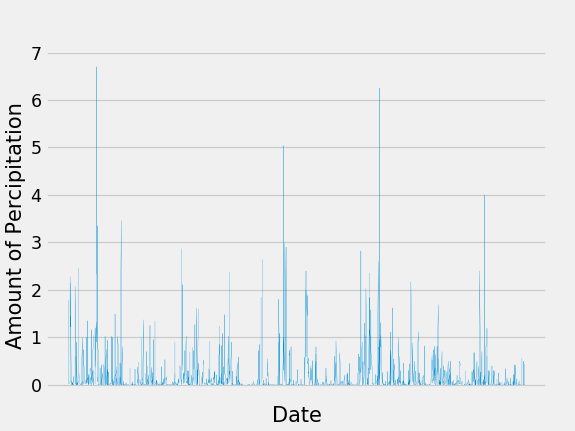

In [153]:
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
aug_23_2017 = session.query(*sel).filter(Measurement.date >= fecha).all()
                                                                       
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(aug_23_2017, columns= ["date", "percipitation"])

# Sort the dataframe by date
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
weather = plt.plot(df["date"], df["percipitation"], linewidth= 0.2)
labels = df["date"]
plt.xticks(np.arange(0, step=10),rotation='vertical')
plt.xlabel("Date")
plt.ylabel("Amount of Percipitation")

plt.show()
# Rotate the xticks for the date

In [155]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_EDA = df.describe()
df_EDA

percipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

In [15]:
# How many stations are available in this dataset?


In [16]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [19]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [21]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [22]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [23]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [24]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [25]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [26]:
# Plot the daily normals as an area plot with `stacked=False`
